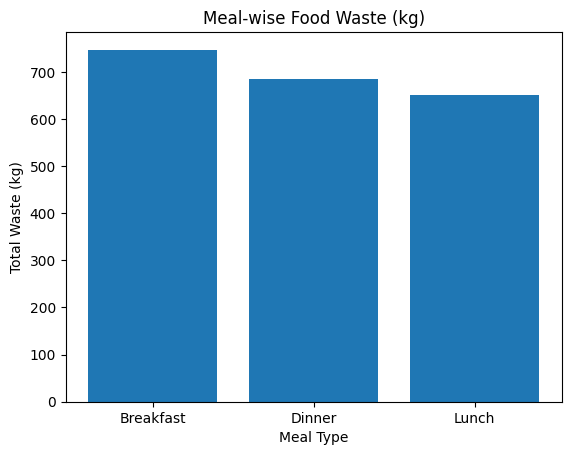

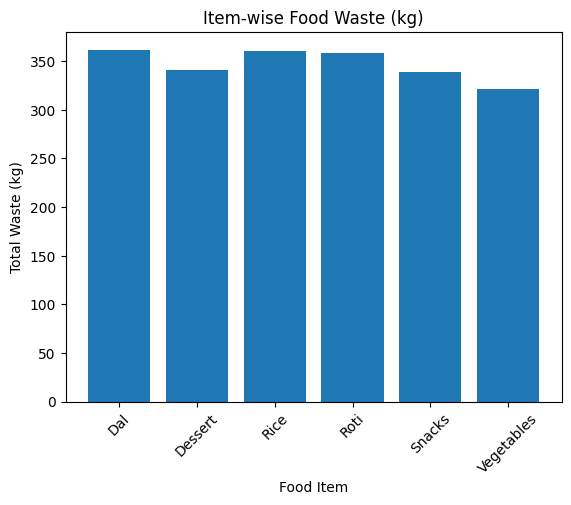

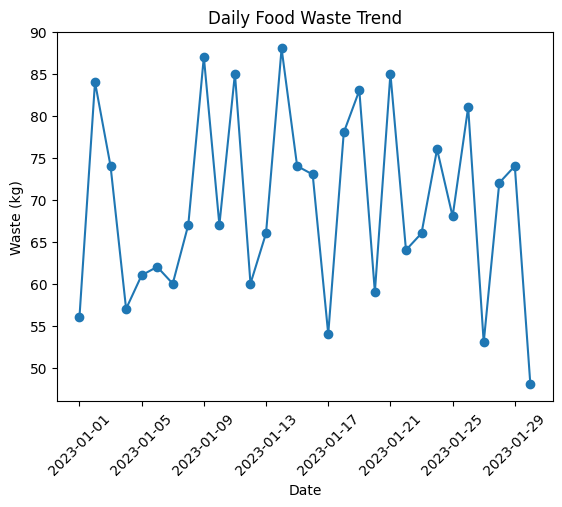

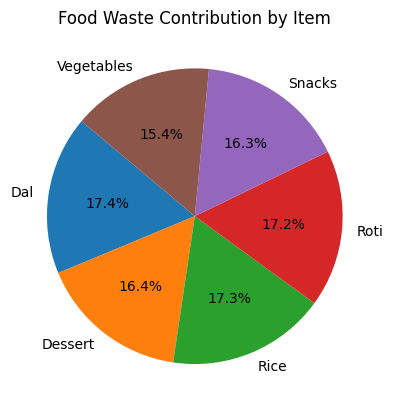


================ KEY INSIGHTS ================
Highest Wastage Meal       : Breakfast
Most Wasted Food Item     : Dal
Total Food Waste          : 2082.00 kg
Total Financial Loss      : ₹60835.00
Peak Waste Day            : 2023-01-14 00:00:00

================ CONCLUSIONS & RECOMMENDATIONS ================
1. Optimize portion sizes for the highest wastage meal to prevent over-preparation.
2. Implement batch cooking and portion control for frequently wasted food items.
3. Introduce food waste tracking dashboards for mess management.
4. Conduct awareness programs for students and staff on food wastage reduction.
5. Reduce quantities of consistently over-prepared food items.
6. Use historical data for demand forecasting and meal planning.
7. Redesign the menu focusing on high-consumption, low-waste items.
8. Establish partnerships with NGOs for safe food donation.
9. Monitor financial losses monthly to improve cost efficiency.
10. Reducing food waste also contributes to environmental sus

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# -------------------------------
# 1. DATA GENERATION
# -------------------------------
def generate_food_data(days=30):
    """
    Generate realistic synthetic food data for a college mess.
    """
    dates = pd.date_range(start="2023-01-01", periods=days, freq="D")
    meal_types = ["Breakfast", "Lunch", "Dinner"]
    food_items = ["Rice", "Roti", "Dal", "Vegetables", "Dessert", "Snacks"]

    cost_per_kg = {
        "Rice": 30,
        "Roti": 10,
        "Dal": 40,
        "Vegetables": 20,
        "Dessert": 50,
        "Snacks": 25
    }

    data = []

    for date in dates:
        for meal in meal_types:
            for item in food_items:
                prepared = np.random.randint(10, 30)
                consumed = np.random.randint(int(0.6 * prepared), prepared + 1)
                wasted = prepared - consumed

                data.append([
                    date, meal, item, prepared, consumed, wasted, cost_per_kg[item]
                ])

    df = pd.DataFrame(data, columns=[
        "Date", "Meal Type", "Food Item",
        "Quantity Prepared (kg)",
        "Quantity Consumed (kg)",
        "Quantity Wasted (kg)",
        "Cost per kg (₹)"
    ])

    df["Total Cost Prepared (₹)"] = df["Quantity Prepared (kg)"] * df["Cost per kg (₹)"]
    df["Waste Cost (₹)"] = df["Quantity Wasted (kg)"] * df["Cost per kg (₹)"]

    return df


# -------------------------------
# 2. METRIC CALCULATION
# -------------------------------
def calculate_waste_metrics(df):
    df["Percentage Waste (%)"] = (
        df["Quantity Wasted (kg)"] / df["Quantity Prepared (kg)"]
    ) * 100
    return df


# -------------------------------
# 3. ANALYSIS FUNCTIONS
# -------------------------------
def meal_wise_analysis(df):
    return df.groupby("Meal Type").agg(
        total_waste_kg=("Quantity Wasted (kg)", "sum"),
        total_loss=("Waste Cost (₹)", "sum")
    ).reset_index()


def item_wise_analysis(df):
    return df.groupby("Food Item").agg(
        total_waste_kg=("Quantity Wasted (kg)", "sum"),
        total_loss=("Waste Cost (₹)", "sum")
    ).reset_index()


# -------------------------------
# 4. VISUALIZATIONS
# -------------------------------
def plot_visualizations(meal_wise, daily_waste, item_wise):

    plt.figure()
    plt.bar(meal_wise["Meal Type"], meal_wise["total_waste_kg"])
    plt.title("Meal-wise Food Waste (kg)")
    plt.xlabel("Meal Type")
    plt.ylabel("Total Waste (kg)")
    plt.show()

    plt.figure()
    plt.bar(item_wise["Food Item"], item_wise["total_waste_kg"])
    plt.title("Item-wise Food Waste (kg)")
    plt.xlabel("Food Item")
    plt.ylabel("Total Waste (kg)")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure()
    plt.plot(daily_waste["Date"], daily_waste["total_waste_kg"], marker="o")
    plt.title("Daily Food Waste Trend")
    plt.xlabel("Date")
    plt.ylabel("Waste (kg)")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure()
    plt.pie(
        item_wise["total_waste_kg"],
        labels=item_wise["Food Item"],
        autopct="%1.1f%%",
        startangle=140
    )
    plt.title("Food Waste Contribution by Item")
    plt.show()


# -------------------------------
# 5. INSIGHTS & CONCLUSIONS
# -------------------------------
def print_key_insights(meal_wise, item_wise, df):

    highest_meal = meal_wise.loc[meal_wise["total_waste_kg"].idxmax()]
    highest_item = item_wise.loc[item_wise["total_waste_kg"].idxmax()]

    total_waste = df["Quantity Wasted (kg)"].sum()
    total_loss = df["Waste Cost (₹)"].sum()

    peak_day = df.groupby("Date")["Quantity Wasted (kg)"].sum().idxmax()

    print("\n================ KEY INSIGHTS ================")
    print(f"Highest Wastage Meal       : {highest_meal['Meal Type']}")
    print(f"Most Wasted Food Item     : {highest_item['Food Item']}")
    print(f"Total Food Waste          : {total_waste:.2f} kg")
    print(f"Total Financial Loss      : ₹{total_loss:.2f}")
    print(f"Peak Waste Day            : {peak_day}")

    print("\n================ CONCLUSIONS & RECOMMENDATIONS ================")
    print("1. Optimize portion sizes for the highest wastage meal to prevent over-preparation.")
    print("2. Implement batch cooking and portion control for frequently wasted food items.")
    print("3. Introduce food waste tracking dashboards for mess management.")
    print("4. Conduct awareness programs for students and staff on food wastage reduction.")
    print("5. Reduce quantities of consistently over-prepared food items.")
    print("6. Use historical data for demand forecasting and meal planning.")
    print("7. Redesign the menu focusing on high-consumption, low-waste items.")
    print("8. Establish partnerships with NGOs for safe food donation.")
    print("9. Monitor financial losses monthly to improve cost efficiency.")
    print("10. Reducing food waste also contributes to environmental sustainability.")


# -------------------------------
# 6. MAIN EXECUTION
# -------------------------------
def main():
    df = generate_food_data(30)
    df = calculate_waste_metrics(df)

    meal_wise = meal_wise_analysis(df)
    item_wise = item_wise_analysis(df)

    daily_waste = df.groupby("Date").agg(
        total_waste_kg=("Quantity Wasted (kg)", "sum")
    ).reset_index()

    plot_visualizations(meal_wise, daily_waste, item_wise)
    print_key_insights(meal_wise, item_wise, df)


if __name__ == "__main__":
    main()
